In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
data.shape

(303, 14)

In [3]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [4]:
target = data.pop('target')
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['sex'], prefix='sex')
c = pd.get_dummies(data['fbs'], prefix='fbs')
data = pd.concat([data,a,b,c,target],axis=1)
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,cp_0,cp_1,cp_2,cp_3,sex_0,sex_1,fbs_0,fbs_1,target
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,0,1,0,1,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,...,2,0,0,1,0,0,1,1,0,1
2,41,0,1,130,204,0,0,172,0,1.4,...,2,0,1,0,0,1,0,1,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,2,0,1,0,0,0,1,1,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,0,0,0,1,0,1,0,1
5,57,1,0,140,192,0,1,148,0,0.4,...,1,1,0,0,0,0,1,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,...,2,0,1,0,0,1,0,1,0,1
7,44,1,1,120,263,0,1,173,0,0.0,...,3,0,1,0,0,0,1,1,0,1
8,52,1,2,172,199,1,1,162,0,0.5,...,3,0,0,1,0,0,1,0,1,1
9,57,1,2,150,168,0,1,174,0,1.6,...,2,0,0,1,0,0,1,1,0,1


In [5]:
drop_col = ['restecg','thalach','exang','oldpeak','slope','cp','ca','thal','sex','fbs']
data = data.drop(columns=drop_col)
data.head(10)

,age,trestbps,chol,cp_0,cp_1,cp_2,cp_3,sex_0,sex_1,fbs_0,fbs_1,target
0,63,145,233,0,0,0,1,0,1,0,1,1
1,37,130,250,0,0,1,0,0,1,1,0,1
2,41,130,204,0,1,0,0,1,0,1,0,1
3,56,120,236,0,1,0,0,0,1,1,0,1
4,57,120,354,1,0,0,0,1,0,1,0,1
5,57,140,192,1,0,0,0,0,1,1,0,1
6,56,140,294,0,1,0,0,1,0,1,0,1
7,44,120,263,0,1,0,0,0,1,1,0,1
8,52,172,199,0,0,1,0,0,1,0,1,1
9,57,150,168,0,0,1,0,0,1,1,0,1


In [6]:
data.isna().sum()

age         0
trestbps    0
chol        0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
sex_0       0
sex_1       0
fbs_0       0
fbs_1       0
target      0
dtype: int64

In [7]:
X = data.iloc[:,0:11]
y = data.iloc[:,-1]
display(X.head())
display(y.head())

,age,trestbps,chol,cp_0,cp_1,cp_2,cp_3,sex_0,sex_1,fbs_0,fbs_1
0,63,145,233,0,0,0,1,0,1,0,1
1,37,130,250,0,0,1,0,0,1,1,0
2,41,130,204,0,1,0,0,1,0,1,0
3,56,120,236,0,1,0,0,0,1,1,0
4,57,120,354,1,0,0,0,1,0,1,0


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.33)

In [9]:
accuracies = {}

#svm
svc = SVC(random_state=0,kernel ='linear')
svc.fit(X_train,y_train)

acc_svm = svc.score(X_test,y_test)*100
print(acc_svm)

77.0


In [10]:
#naive bayes
nb = GaussianNB()
nb.fit(X_train,y_train)

acc_nb = nb.score(X_test,y_test)*100
acc_nb

68.0

In [11]:
#logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

acc_lr = lr.score(X_test,y_test)*100
acc_lr

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


71.0

In [12]:
#decision trees
dt = DecisionTreeClassifier(random_state=4)
dt.fit(X_train,y_train)

acc_dt = dt.score(X_test,y_test)*100
acc_dt

73.0

In [13]:
#random forest
'''score_list = dict()
for i in range(100):'''
rf = RandomForestClassifier(random_state=69)
rf.fit(X_train,y_train)

acc_rf = rf.score(X_test,y_test)*100
'''    score_list[i]=acc_rf
k = max(score_list,key=score_list.get)
k'''
acc_rf

82.0

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
acc_knn = knn.score(X_test,y_test)*100
acc_knn

51.0

NameError: name 'np' is not defined

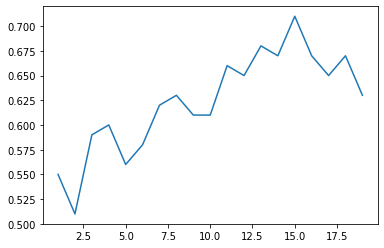

In [15]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.show()

acc = max(scoreList)*100
acc

In [17]:
test = pd.read_csv('/kaggle/input/heartdiseaseself/data_self.csv')
test['pain score'] = test['pain score'].fillna(test['pain score'].mode()[0])

In [18]:
test

,age,sex,pain score,blood pressure,cholesterol,fasting blood sugar
0,35,male,1.0,130,238,96
1,30,male,1.0,122,148,82
2,24,male,1.0,116,150,94
3,36,male,1.0,172,192,93
4,34,male,1.0,120,143,90
5,29,female,1.0,106,142,100
6,25,male,1.0,123,168,87
7,29,male,1.0,128,133,88
8,25,female,1.0,103,159,92
9,26,male,1.0,110,155,77


In [19]:
def pred(model,d):
    d = d.dropna().reset_index(drop=True)
    d['cp_0']= None
    d['cp_1']= None
    d['cp_2']=None
    d['cp_3']=None
    d['sex_0']=None
    d['sex_1']=None
    d['fbs_0']=None
    d['fbs_1']=None
    for i in d.index:
        ps = d.loc[i]['pain score']
        fbs = d.loc[i]['fasting blood sugar']
        sex = d.loc[i]['sex']
        if ps>=0 and ps<3:
            d['cp_0'].loc[i] = 1
            d['cp_1'].loc[i] = 0
            d['cp_2'].loc[i] = 0
            d['cp_3'].loc[i] = 0
        elif ps>=3 and ps<6:
            d['cp_0'].loc[i] = 0
            d['cp_1'].loc[i] = 1
            d['cp_2'].loc[i] = 0
            d['cp_3'].loc[i] = 0
        elif ps>=6 and ps<9:
            d['cp_0'].loc[i] = 0
            d['cp_1'].loc[i] = 0
            d['cp_2'].loc[i] = 1
            d['cp_3'].loc[i] = 0
        elif ps>=9 and ps<=10:
            d['cp_0'].loc[i] = 0
            d['cp_1'].loc[i] = 0
            d['cp_2'].loc[i] = 0
            d['cp_3'].loc[i] = 1
        if sex == 'male':
            d['sex_0'].loc[i]=0
            d['sex_1'].loc[i]=1
        else:
            d['sex_0'].loc[i]=1
            d['sex_1'].loc[i]=0
        if fbs >=100:
            d['fbs_0'].loc[i]=0
            d['fbs_1'].loc[i]=1
        elif fbs<100:
            d['fbs_0'].loc[i]=1
            d['fbs_1'].loc[i]=0
    d = d.drop(columns = ['pain score','sex','fasting blood sugar'])
    display(d)
    p = model.predict(d)
    return p

In [20]:
import time
a = time.time()
print(pred(rf,test))
b = time.time()
print(str(b-a))

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,age,blood pressure,cholesterol,cp_0,cp_1,cp_2,cp_3,sex_0,sex_1,fbs_0,fbs_1
0,35,130,238,1,0,0,0,0,1,1,0
1,30,122,148,1,0,0,0,0,1,1,0
2,24,116,150,1,0,0,0,0,1,1,0
3,36,172,192,1,0,0,0,0,1,1,0
4,34,120,143,1,0,0,0,0,1,1,0
5,29,106,142,1,0,0,0,1,0,0,1
6,25,123,168,1,0,0,0,0,1,1,0
7,29,128,133,1,0,0,0,0,1,1,0
8,25,103,159,1,0,0,0,1,0,1,0
9,26,110,155,1,0,0,0,0,1,1,0


[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0]
0.12370657920837402
